In [1]:
"""
Syntax dibawah merupakan syntax untuk mengimport/memanggil library library yang akan
digunakan untuk mengolah citra yang ada, library-library yang digunakan antara lain, 
metplotlib.pyplot (plt), cv2 (cv) dan numpy (np)
"""
import cv2
import matplotlib.pyplot as plt
import numpy as np

(747, 1070)

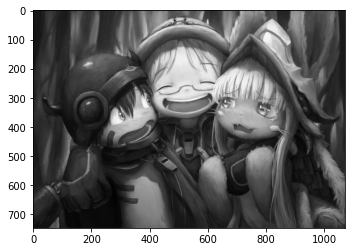

In [2]:
"""
Syntax dibawah merupakan insialisasi dari variabel image, yang mana merupakan
variabel yang digunakan untuk menyimpan citra yang akan diolah dengan menggunakan
method imread dari library cv2 yang dimana citranya diambil dari local komputer 
dan menampilkannya dengan method imshow dari method yang sama
"""
image = cv2.imread('jurnalmodul6.jpg', 0)
plt.imshow(image, 'gray')
image.shape

In [3]:
"""
Syntax dibawah merupakan inisialisasi dari variabel
kernel untuk proses deteksi tepi pada citra
"""
sx = np.array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ])
sy = np.array([
        [-1, -2, -1],
        [0, 0, 0],
        [1, 2, 1]
    ])

px = np.array([
        [-1, 0, 1],
        [-1, 0, 1],
        [-1, 0, 1]
    ])
py = np.array([
        [-1, -1, -1],
        [0, 0, 0],
        [1, 1, 1]
    ])

rx = np.array([
        [1, 0],
        [0, -1]
    ])
ry = np.array([
        [0, 1],
        [-1, 0]
    ])

In [4]:
def normalisasi (img):
    a, b = np.max(img), np.min(img)

    """
    Syntax dibawah merupakan pengembalian hasil normalisasi
    dari citra setelah pemanggilan dari function ini
    """
    return ((img-b)*255)//(a-b)

In [5]:
def filter (img, window):
    windlen = len(window)
    mid1, mid2 = int ((windlen-1)/2), int ((windlen-1)/2)
    result = np.zeros(img.shape)

    pad = np.pad(img, ( 
        (mid1, windlen-mid1),
        (mid2, windlen-mid2)),
        'constant' )

    for i in range (img.shape[0]):
        for j in range (img.shape[1]):
            for k in range (windlen):
                for l in range (windlen):
                    result[i, j] += pad[i+k, j+l] * window[k, l]
    
    """
    Syntax dibawah merupakan pengembalian hasil filtering 
    deteksi tepi dari citra setelah pemanggilan dari function ini
    """
    return result

In [6]:
def detectEdge (img, sx, sy):
    filterx = filter(img, sx)
    filtery = filter(img, sy)

    result = np.zeros(img.shape)
    result = np.sqrt( np.power(filterx, 2) + np.power(filtery, 2))
    
    """
    Syntax dibawah merupakan pengembalian hasil deteksi tepi
    dari citra setelah pemanggilan dari function ini
    """
    return result

# No. 1

In [10]:
"""
Syntax dibawah merupakan penginisialisasian dari variabel sobel, 
prewitt dan robert, yang mana diisi dengan nilai balikan dari 
function yang dipanggil didalamnya yaitu function detectEdge
"""
Sobel = np.array (detectEdge(image, sx, sy), dtype = int)
Prewitt = np.array (detectEdge(image, px, py), dtype = int)
Robert = np.array (detectEdge(image, rx, ry), dtype = int)

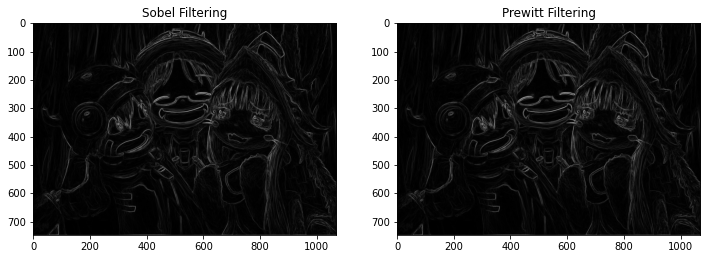

In [11]:
"""
Syntax dibawah merupakan inisialisasi untuk menggunakan method 
figure dari library matplotlib.pyplot (plt) yang digunakan untuk 
menambahkan subplot agar bisa menampilkan citra secara menyamping 
(side-to-side)
"""
plt.figure(figsize=(25, 25))
plt.subplot(141)
plt.title('Original')
plt.imshow(image, 'gray')
plt.subplot(142)
plt.title('Sobel Filtering')
plt.imshow(Sobel, 'gray')
plt.subplot(143)
plt.title('Prewitt Filtering')
plt.imshow(Prewitt, 'gray')
plt.subplot(144)
plt.title('Robert Filtering')
plt.imshow(Robert, 'gray')

# No. 2

In [ ]:
def findWhite (image):

    """
    Syntax dibawah merupakan perulangan for yang digunakan 
    untuk iterasi dari pixel 0,0 pada citra sampai index 
    terakhir dari citra
    """
    whiteValue = 0
    for row in range(image.shape[0]):
        for col in range(image.shape[1]):
            if image[row][col] == 0:
                whiteValue += 1

    """
    Syntax dibawah merupakan pengembalian hasil pencarian 
    persebaran nilai tingkat pixel yang bernilai 0 pada 
    sebuah citra setelah pemanggilan dari function ini
    """
    return whiteValue

In [ ]:
normImgsobel = normalisasi(Sobel)
normImgprewitt = normalisasi(Prewitt)
normImgrobert = normalisasi(Robert)

whiteSobel = findWhite(normImgsobel)
whitePrewitt = findWhite(normImgprewitt)
whiteRobert = findWhite(normImgrobert)

print(whiteSobel, whitePrewitt, whiteRobert)

"""
Berdasarkan hasil pencarian nilai pixel yang memiliki warna putih
terbanyak adalah dengan menggunakan metode prewitt
"""

51266 85022 57887
